<a href="https://colab.research.google.com/github/abdinegara783/GRNN/blob/main/Analisis_Data_Braincore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generalized Regression Neural Network**
**(by Abdi Negara Guci S.Mat)**

Halo Teman - Teman, Kali ini saya akan menjelaskan terkait sebuah metode *Neural Network* , metode ini bernama **Generalized Regression Neural Network (GRNN)**. Metode ini merupakan jenis *Neural Network* yang umum digunakan untuk tugas regresi, yang melibatkan suatu prediksi nilai kontinu berdasarkan suatu *Input* data. GRNN ini juga menurut saya sangat unik, karena menggunakan suatu kernel *Radial Basis Function* (RBF) yang biasanya kita temui kalau kita belajar lebih mendalam tentang kernel pada *Support Vector Machine*


## **Karakteristik GRNN**

Berikut adalah beberapa karakteristik kunci dari GRNN:

1. **Fungsi Basis Radial (RBF)**: GRNN menggunakan fungsi basis radial untuk mentransformasi data masukan ke dalam ruang fitur berdimensi lebih tinggi. Fungsi basis radial adalah fungsi matematika yang bergantung hanya pada jarak dari titik pusat, yang dikenal sebagai pusat atau prototipe. Fungsi basis radial yang paling umum digunakan dalam GRNN adalah fungsi Gaussian.

2. **Pembelajaran Sekali Jalan:** GRNN melakukan proses pembelajaran sekali jalan, yang berarti mereka belajar set data latih segera setelah disajikan. Hal ini membuatnya efisien terutama untuk tugas regresi dengan kumpulan data berukuran kecil hingga sedang.

3. **Pelatihan Cepat:** Pelatihan GRNN umumnya lebih cepat dibandingkan dengan jenis jaringan saraf lainnya karena tidak melibatkan proses optimisasi iteratif seperti gradien turun. Sebaliknya, ia menghitung bobot selama pelatihan berdasarkan data pelatihan dan menyimpannya untuk digunakan nanti selama prediksi.

4. **Pendekatan Universal:** Seperti banyak arsitektur jaringan saraf lainnya, GRNN adalah pendekatan fungsi universal, yang berarti mereka memiliki kapasitas untuk memperkirakan fungsi kontinu apa pun dengan akurasi sewenang-wenang dengan jumlah neuron tersembunyi yang cukup.

5. **Tugas Regresi:** Sementara beberapa jaringan saraf dirancang untuk tugas klasifikasi (di mana keluarannya adalah kategori atau label), GRNN secara khusus ditujukan untuk tugas regresi, di mana tujuannya adalah untuk memprediksi variabel keluaran kontinu berdasarkan fitur masukan.

## **Pendekatan Matematika GRNN**

Untuk membahas GRNN secara matematis, maka pada kesempatan kali ini saya berusaha memahami konsepnya dari jurnal aslinya langsung dari bapak *Donald F. Specht* pada papernya berjudul ***A General Regression Neural Network*** Namun sebelum itu, ada beberapa konsep matematis yang menurut saya perlu dipahami lebih lanjut untuk itu, simak beberapa penjelasan berikut ini.
 1. **Fungsi Kepadatan peluang Bersama:** Jika $X$ dan $Y$ adalah dua variabel acak kontinu, maka fungsi kepadatan peluang bersama $f(x,y)$ untuk $X$ dan $Y$ adalah fungsi yang memenuhi sifat berikut:
 *  $f(x,y) \geq 0$ untuk setiap $(x)$ dan $(y)$.
 *  $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \, dx \, dy = 1$, yaitu total area di bawah kurva $f(x, y)$ sama dengan $1$.
 *  Untuk setiap daerah $R$ di bidang $xy$, probabilitas $X$ dan $Y$ jatuh dalam $R$ adalah $P((X,Y) \in R) = \iint_R f(x, y) \, dx \, dy$.
 * Misalkan \( X \) adalah variabel acak kontinu dengan fungsi kepadatan peluang:

 >  $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} ...\text{(1)}$

 di mana $\mu$ adalah rata-rata (mean) dari distribusi $X$ dan $\sigma^2$ adalah varians (variance) dari distribusi $X$. Persamaan $(1)$ adalah bentuk standar dari fungsi kepadatan peluang untuk distribusi normal (Gaussian), di mana $\mu$ adalah rata-rata (mean) dan $\sigma^2$ adalah varians (variance) dari distribusi $X$.






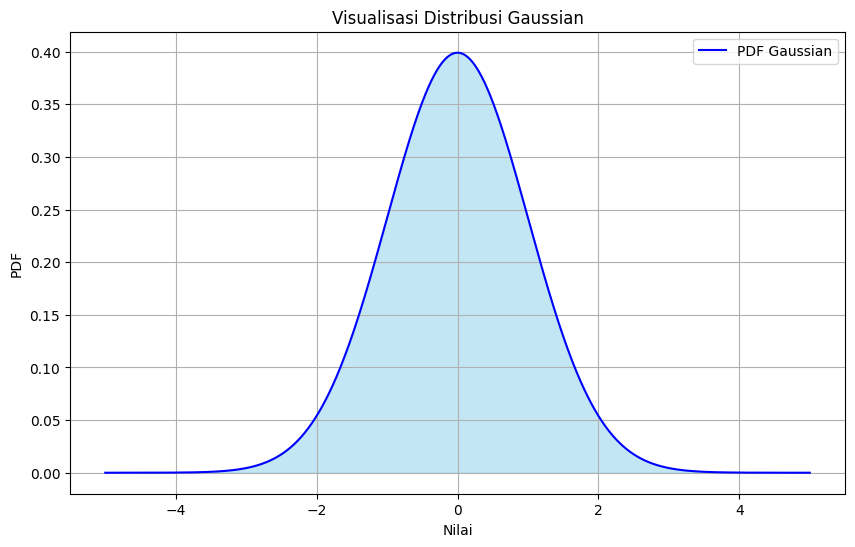

In [ ]:
# @title **Contoh $f(x)$ atau nilai PDF pada distribusi Gaussian**
import numpy as np
import matplotlib.pyplot as plt

# Fungsi kepadatan peluang (PDF) Gaussian
def gaussian_pdf(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Generate data untuk x dari -5 sampai 5
x = np.linspace(-5, 5, 1000)

# Parameter distribusi Gaussian
mu = 0  # Rata-rata
sigma = 1  # Standar deviasi

# Hitung nilai PDF untuk setiap titik x
pdf_values = gaussian_pdf(x, mu, sigma)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label='PDF Gaussian', color='blue')
plt.fill_between(x, pdf_values, color='skyblue', alpha=0.5)
plt.title('Visualisasi Distribusi Gaussian')
plt.xlabel('Nilai')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()


2. **Window Parzen:** jendela Parzen atau Window Parzen adalah salah satu metode non-parametrik untuk estimasi fungsi kepadatan peluang (PDF) dari data. Metode ini termasuk dalam kategori metode kernel density estimation (KDE), yang digunakan untuk mengevaluasi distribusi probabilitas dari sampel data

  Secara umum, untuk titik data $x$, PDF diestimasi sebagai jumlah dari kontribusi dari setiap titik data yang terletak di sekitarnya, yang diberi bobot sesuai dengan jarak dari titik data tersebut ke titik $x$.Rumus umum untuk estimasi PDF menggunakan metode jendela Parzen adalah:
  
  >  $\hat{f}(x) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - x_i)...(2)$

  Persamaan $(2)$ Menyatakan Bahwa:
  - $\hat{f}(x)$ adalah estimasi PDF di titik $x$.
  - $n$ adalah jumlah total titik data.
  - $x_i$ adalah titik data.
  - $K_h$ adalah fungsi jendela dengan lebar jendela $h$.
  
  Fungsi jendela $K_h$ memungkinkan bobot titik data yang lebih dekat dengan $x$ memiliki kontribusi yang lebih besar dalam estimasi PDF. Salah satu fungsi jendela yang umum digunakan adalah fungsi Gaussian.

  Metode jendela Parzen dapat digunakan untuk memodelkan distribusi probabilitas dari data yang tidak mengikuti distribusi tertentu dengan baik, atau ketika tidak ada asumsi tertentu tentang distribusi data yang dapat dibuat. Namun, pemilihan bandwidth $h$ yang tepat adalah penting dalam penggunaan metode ini. Jika bandwidth terlalu kecil, estimasi PDF akan terlalu bergejolak, sedangkan jika bandwidth terlalu besar, estimasi akan terlalu halus dan bisa kehilangan detail penting dari data.

3. **Ekspektasi $f(\textbf{X},Y):$** Berikut adalah rumus untuk menghitung ekspektasi bersyarat dalam konteks vektor:

>  $E(Y|X) = \frac{{\int_{-\infty}^{\infty} y \cdot f_{Y|X}(y|x) \, dy}}{{\int_{-\infty}^{\infty} f_{Y|X}(y|x) \, dy}}...(3)$

  di mana $f_{Y|X}(y|x)$ adalah fungsi kepadatan peluang bersyarat (PDF) dari $Y$ diberikan $X = x$.Dalam konteks vektor, kita juga harus mempertimbangkan distribusi bersyarat dari $X$. Jika $X$ adalah vektor, kita juga perlu memperhitungkan kondisi untuk setiap elemen dalam vektor $X$. Rumus di atas memberikan ekspektasi dari $Y$ yang diberikan nilai $X$, yang dibagi oleh ekspektasi bersama dari $X$. Ini memungkinkan kita untuk mengetahui nilai rata-rata dari $Y$ ketika nilai $X$ diketahui.

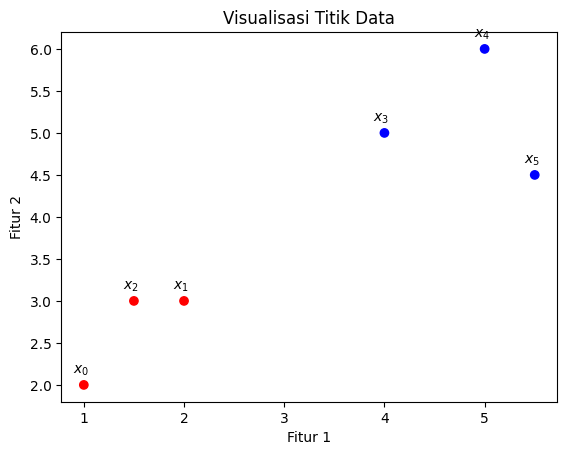

Hasil Kernel Gaussian (Kesamaan Antar Data):
Kernel(Gaussian)(x_0, x_0) = 1.000
Kernel(Gaussian)(x_0, x_1) = 0.368
Kernel(Gaussian)(x_0, x_2) = 0.535
Kernel(Gaussian)(x_0, x_3) = 0.000
Kernel(Gaussian)(x_0, x_4) = 0.000
Kernel(Gaussian)(x_0, x_5) = 0.000
Kernel(Gaussian)(x_1, x_0) = 0.368
Kernel(Gaussian)(x_1, x_1) = 1.000
Kernel(Gaussian)(x_1, x_2) = 0.882
Kernel(Gaussian)(x_1, x_3) = 0.018
Kernel(Gaussian)(x_1, x_4) = 0.000
Kernel(Gaussian)(x_1, x_5) = 0.001
Kernel(Gaussian)(x_2, x_0) = 0.535
Kernel(Gaussian)(x_2, x_1) = 0.882
Kernel(Gaussian)(x_2, x_2) = 1.000
Kernel(Gaussian)(x_2, x_3) = 0.006
Kernel(Gaussian)(x_2, x_4) = 0.000
Kernel(Gaussian)(x_2, x_5) = 0.000
Kernel(Gaussian)(x_3, x_0) = 0.000
Kernel(Gaussian)(x_3, x_1) = 0.018
Kernel(Gaussian)(x_3, x_2) = 0.006
Kernel(Gaussian)(x_3, x_3) = 1.000
Kernel(Gaussian)(x_3, x_4) = 0.368
Kernel(Gaussian)(x_3, x_5) = 0.287
Kernel(Gaussian)(x_4, x_0) = 0.000
Kernel(Gaussian)(x_4, x_1) = 0.000
Kernel(Gaussian)(x_4, x_2) = 0.000
Kernel(Gau

In [ ]:
# @title **Pengaruh Kernel RBF terhadap Kemiripan Data**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# Data
X = np.array([[1, 2],
              [2, 3],
              [1.5, 3],
              [4, 5],
              [5, 6],
              [5.5,4.5]])

# Visualisasi dataset dengan warna yang berbeda untuk setiap poin
plt.scatter(X[:, 0], X[:, 1], c=['red', 'red', 'red', 'blue', 'blue', 'blue'])
for i, txt in enumerate(['$x_0$', '$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$']):
    plt.annotate(txt, (X[i, 0], X[i, 1]), xytext=(-8, 8), textcoords='offset points')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Visualisasi Titik Data')
plt.show()

# Menghitung kernel Gaussian antara setiap pasangan data
gamma = 0.5  # Parameter gamma untuk kernel Gaussian
K = rbf_kernel(X, X, gamma=gamma)

# Mencetak hasil kernel untuk seluruh matriks K
print("Hasil Kernel Gaussian (Kesamaan Antar Data):")
for i in range(len(X)):
    for j in range(len(X)):
        print(f"Kernel(Gaussian)(x_{i}, x_{j}) = {K[i, j]:.3f}")


## **Membuat Model GRNN**

In [ ]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class GRNN:

    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.std = np.ones((1, self.y_train.size))  # Standard deviations

    def activation_func(self, distances):  # Gaussian kernel
        return np.exp(-(distances**2) / (2 * (self.std**2)))

    def output(self, i):
        distances = np.sqrt(np.sum((self.x_test[i] - self.x_train)**2, axis=1))  # Euclidean distance
        return self.activation_func(distances)

    def denominator(self, i):
        return np.sum(self.output(i))

    def numerator(self, i):
        return np.sum(self.output(i) * self.y_train)

    def predict(self):
        predict_array = np.array([])

        for i in tqdm(range(self.y_test.size), desc="Predicting"):
            predict = np.array([self.numerator(i) / self.denominator(i)])
            predict_array = np.append(predict_array, predict)

        return predict_array

    def mean_squared_error(self):
        return (self.predict() - self.y_test)**2 / self.y_test.size

    def root_mean_squared_error(self):
        return np.sqrt(self.mean_squared_error())


## **Generate Data**

In [ ]:
weight = [2.8, 3.8, 4.3, 5.6, 6.2, 6.4, 7, 7.4, 7.65, 7.9, 8.1, 8.3, 8.5]  # Baby weight from birth to 1 year old (mean)
height = [45.7, 52.7, 56, 59, 61, 63.5, 65.1, 66.6, 68, 69.5, 70.5, 71.5, 73]  # Baby height from birth to 1 year (mean)
new_feature = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]  # Contoh fitur baru
random_variable = np.random.rand(13)  # Generate 13 random values

# Konversi ke array numpy
weight = np.array(weight)
height = np.array(height)
new_feature = np.array(new_feature)
random_variable = np.array(random_variable)


In [ ]:
X = np.stack((weight, height,  random_variable),axis=1)
X

array([[ 2.8       , 45.7       ,  0.56961841],
       [ 3.8       , 52.7       ,  0.70373728],
       [ 4.3       , 56.        ,  0.28847644],
       [ 5.6       , 59.        ,  0.43328806],
       [ 6.2       , 61.        ,  0.75610669],
       [ 6.4       , 63.5       ,  0.39609828],
       [ 7.        , 65.1       ,  0.89603839],
       [ 7.4       , 66.6       ,  0.63892108],
       [ 7.65      , 68.        ,  0.89155444],
       [ 7.9       , 69.5       ,  0.68005557],
       [ 8.1       , 70.5       ,  0.44919774],
       [ 8.3       , 71.5       ,  0.97857093],
       [ 8.5       , 73.        ,  0.11620191]])

In [ ]:
X.shape

(13, 3)

In [ ]:
age = np.arange(0,13,1)
y = age.reshape(-1,1)
y = y.reshape(-1)
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
y.shape

(13,)

## **Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

array([[ 4.3       , 56.        ,  0.28847644],
       [ 3.8       , 52.7       ,  0.70373728],
       [ 8.5       , 73.        ,  0.11620191],
       [ 6.2       , 61.        ,  0.75610669],
       [ 7.4       , 66.6       ,  0.63892108],
       [ 8.1       , 70.5       ,  0.44919774],
       [ 5.6       , 59.        ,  0.43328806],
       [ 7.        , 65.1       ,  0.89603839]])

In [ ]:
model = GRNN(X_train,y_train,X_test,y_test)

In [ ]:
model.predict()

Predicting: 100%|██████████| 5/5 [00:00<00:00, 2858.32it/s]


array([10.59603046,  9.93848998,  1.        ,  7.23961048,  5.69623079])

In [ ]:
print('Output                                 :',model.predict())
print('MSE                                    :',model.mean_squared_error())

Predicting: 100%|██████████| 5/5 [00:00<00:00, 6674.58it/s]


Output                                 : [10.59603046  9.93848998  1.          7.23961048  5.69623079]


Predicting: 100%|██████████| 5/5 [00:00<00:00, 7184.49it/s]

MSE                                    : [0.03263828 0.17615269 0.2        0.11563845 0.09694746]


## **Prediction**

In [ ]:
y_pred = model.predict()
y_pred

Predicting: 100%|██████████| 5/5 [00:00<00:00, 7598.38it/s]


array([10.59603046,  9.93848998,  1.        ,  7.23961048,  5.69623079])

In [ ]:
y_test

array([11,  9,  0,  8,  5])

In [ ]:
from sklearn.metrics import mean_squared_error

# Menghitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

0.6064733797945039

In [ ]:
np.stack((y_test, model.predict()),axis=1)

array([[11.        , 10.69727375],
       [ 9.        ,  9.94091585],
       [ 0.        ,  1.        ],
       [ 8.        ,  7.25761362],
       [ 5.        ,  5.71011515]])

## **Sekarang Kita akan coba menggunakan Data Analisis yang diberikan**

In [ ]:
import pandas as pd

In [ ]:
# Membaca data
dataku = pd.read_excel('/content/DATA GRNN .xlsx')

In [ ]:
dataku

,NO,TANGGAL PEMBAYARAN,KONTRIBUSI DASAR,MASA KONTRAK,USIA MASUK ASURANSI,TOTAL KLAIM
0,1,2018-11-19,300000.0,30.0,50.0,2749653.0
1,2,2018-01-11,500000.0,20.0,36.0,750000.0
2,3,2018-01-22,212000.0,2.0,25.0,55000000.0
3,4,2018-01-11,500000.0,54.0,26.0,4553020.0
4,5,2018-01-11,600000.0,15.0,28.0,2700000.0
...,...,...,...,...,...,...
17960,18099,NaN,NaN,NaN,NaN,NaN
17961,18100,NaN,NaN,NaN,NaN,NaN
17962,18101,NaN,NaN,NaN,NaN,NaN
17963,18102,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NO                   17965 non-null  int64  
 1   TANGGAL PEMBAYARAN   17849 non-null  object 
 2   KONTRIBUSI DASAR     17849 non-null  float64
 3   MASA KONTRAK         17849 non-null  float64
 4   USIA MASUK ASURANSI  17849 non-null  float64
 5   TOTAL KLAIM          17849 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 842.2+ KB


In [ ]:
dataku.dtypes

NO                       int64
TANGGAL PEMBAYARAN      object
KONTRIBUSI DASAR       float64
MASA KONTRAK           float64
USIA MASUK ASURANSI    float64
TOTAL KLAIM            float64
dtype: object

In [ ]:
# Mencari nilai integer yang bernilai 0 dalam suatu baris data
row_with_zero_int = dataku[(dataku == 0).any(axis=1)]

print("Baris data dengan nilai integer 0:")
print(row_with_zero_int)

Baris data dengan nilai integer 0:
          NO TANGGAL PEMBAYARAN  KONTRIBUSI DASAR  MASA KONTRAK  \
1089    1090         2019-04-02          300000.0          53.0   
1919    1920         2019-09-10         1000000.0          56.0   
1923    1924         2019-09-10          200000.0          49.0   
1932    1933         2019-09-12         2000000.0          68.0   
2063    2064         2019-09-30          300000.0          56.0   
4960    4961         2020-09-01          300000.0          54.0   
15109  15110         2022-12-15          900000.0          80.0   

       USIA MASUK ASURANSI  TOTAL KLAIM  
1089                   0.0     296323.0  
1919                  44.0          0.0  
1923                  51.0          0.0  
1932                  32.0          0.0  
2063                   0.0     890461.0  
4960                   0.0    2292668.0  
15109                  0.0    1787375.0  


In [ ]:
# Menghapus baris-baris yang ditemukan
df_cleaned = dataku.drop(row_with_zero_int.index)

# Mereset ulang indeks
df_cleaned = df_cleaned.reset_index(drop=True)

# Menampilkan DataFrame setelah menghapus baris-baris dan mereset indeks
print("DataFrame setelah menghapus baris-baris dan mereset indeks:")
print(df_cleaned)

DataFrame setelah menghapus baris-baris dan mereset indeks:
          NO TANGGAL PEMBAYARAN  KONTRIBUSI DASAR  MASA KONTRAK  \
0          1         2018-11-19          300000.0          30.0   
1          2         2018-01-11          500000.0          20.0   
2          3         2018-01-22          212000.0           2.0   
3          4         2018-01-11          500000.0          54.0   
4          5         2018-01-11          600000.0          15.0   
...      ...                ...               ...           ...   
17953  18099                NaN               NaN           NaN   
17954  18100                NaN               NaN           NaN   
17955  18101                NaN               NaN           NaN   
17956  18102                NaN               NaN           NaN   
17957  18103                NaN               NaN           NaN   

       USIA MASUK ASURANSI  TOTAL KLAIM  
0                     50.0    2749653.0  
1                     36.0     750000.0  
2        

In [ ]:
# Memeriksa nilai yang hilang dalam DataFrame
missing_values = df_cleaned.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

# Jumlah total nilai yang hilang dalam DataFrame
total_missing = df_cleaned.isnull().sum().sum()
print("\nJumlah total nilai yang hilang dalam DataFrame:", total_missing)

Jumlah nilai yang hilang dalam setiap kolom:
NO                       0
TANGGAL PEMBAYARAN     116
KONTRIBUSI DASAR       116
MASA KONTRAK           116
USIA MASUK ASURANSI    116
TOTAL KLAIM            116
dtype: int64

Jumlah total nilai yang hilang dalam DataFrame: 580


In [ ]:
# Menghapus baris dengan nilai yang hilang
df_cleaned = df_cleaned.dropna()

# Mengatur ulang indeks
df_cleaned = df_cleaned.reset_index(drop=True)

# Menampilkan DataFrame setelah menghapus baris yang mengandung nilai yang hilang dan mengatur ulang indeks
print("DataFrame setelah menghapus baris yang mengandung nilai yang hilang dan mengatur ulang indeks:")
print(df_cleaned)

DataFrame setelah menghapus baris yang mengandung nilai yang hilang dan mengatur ulang indeks:
          NO TANGGAL PEMBAYARAN  KONTRIBUSI DASAR  MASA KONTRAK  \
0          1         2018-11-19          300000.0          30.0   
1          2         2018-01-11          500000.0          20.0   
2          3         2018-01-22          212000.0           2.0   
3          4         2018-01-11          500000.0          54.0   
4          5         2018-01-11          600000.0          15.0   
...      ...                ...               ...           ...   
17837  17967         2023-07-31          300000.0          17.0   
17838  17968         2023-07-31          500000.0          36.0   
17839  17969         2023-07-31          200000.0          62.0   
17840  17970         2023-07-31          200000.0          35.0   
17841  17977         2023-07-31          900000.0          18.0   

       USIA MASUK ASURANSI  TOTAL KLAIM  
0                     50.0    2749653.0  
1               

In [ ]:
# Memeriksa nilai yang hilang dalam DataFrame
missing_values = df_cleaned.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

# Jumlah total nilai yang hilang dalam DataFrame
total_missing = df_cleaned.isnull().sum().sum()
print("\nJumlah total nilai yang hilang dalam DataFrame:", total_missing)

Jumlah nilai yang hilang dalam setiap kolom:
NO                     0
TANGGAL PEMBAYARAN     0
KONTRIBUSI DASAR       0
MASA KONTRAK           0
USIA MASUK ASURANSI    0
TOTAL KLAIM            0
dtype: int64

Jumlah total nilai yang hilang dalam DataFrame: 0


In [ ]:
# # Menghapus kolom
df = df_cleaned.drop(['NO','TANGGAL PEMBAYARAN'], axis=1)

# Menampilkan DataFrame setelah menghapus kolom
print("\nDataFrame setelah menghapus kolom ':")
print(df)
print(df.shape)


DataFrame setelah menghapus kolom ':
       KONTRIBUSI DASAR  MASA KONTRAK  USIA MASUK ASURANSI  TOTAL KLAIM
0              300000.0          30.0                 50.0    2749653.0
1              500000.0          20.0                 36.0     750000.0
2              212000.0           2.0                 25.0   55000000.0
3              500000.0          54.0                 26.0    4553020.0
4              600000.0          15.0                 28.0    2700000.0
...                 ...           ...                  ...          ...
17837          300000.0          17.0                 25.0    6120000.0
17838          500000.0          36.0                 39.0     483954.0
17839          200000.0          62.0                 18.0    9181278.0
17840          200000.0          35.0                 45.0    8267433.0
17841          900000.0          18.0                 27.0    5974000.0

[17842 rows x 4 columns]
(17842, 4)


## **Data Normalization**

In [ ]:
X = df[['KONTRIBUSI DASAR', 'MASA KONTRAK', 'USIA MASUK ASURANSI']]
y = df['TOTAL KLAIM']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Membuat objek MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform scaler on X and y
X = scaler.fit_transform(np.array(X))
y = scaler.fit_transform(np.array(y).reshape(-1, 1))
y = y.reshape(-1)

In [ ]:
X.shape

(17842, 3)

In [ ]:
y.shape

(17842,)

## **Splitting Data**

In [ ]:
# Memisahkan data menjadi 70% untuk training dan 30% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Membangun Model GRNN**

In [ ]:
model = GRNN(X_train,y_train,X_test,y_test)

In [ ]:
y_pred = model.predict()

Predicting: 100%|██████████| 3569/3569 [00:06<00:00, 587.76it/s]


## **Model Evaluasi**

In [ ]:
from sklearn.metrics import mean_squared_error

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.0002717137029419998


In [ ]:
# Proses untuk mengembalikan y ke bentuk awal
y_pred_ori = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_ori = y_pred_ori.flatten()  # Mengubah dimensi y ke bentuk awal
y_test_ori = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_ori = y_test_ori.flatten()  # Mengubah dimensi y ke bentuk awal

## **Perbandingan Dengan SVR**

In [ ]:
# Impor library yang diperlukan
import numpy as np
from sklearn.svm import SVR

# Membangun model SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Melatih model
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.004125899419823395


In [ ]:
# Proses untuk mengembalikan y ke bentuk awal
y_pred_ori = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_ori = y_pred_ori.flatten()  # Mengubah dimensi y ke bentuk awal
y_test_ori = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_ori = y_test_ori.flatten()  # Mengubah dimensi y ke bentuk awal